### Data Exploration Oluwaseyifunmi and Aminat
\- Open the Titanic passenger list (dataset) in Python.    
\- Show the first few passengers (rows) so everyone knows what’s inside.    
\- Check if any passenger info is missing (e.g., age, ticket price).    
\- Draw pictures (visualizations) to show how things like age or ticket class relate to survival.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
titanic = sns.load_dataset("titanic") # Load the Titanic dataset from Seaborn

In [3]:
print(titanic.head(10)) # Display the first ten rows


   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

In [4]:
# Basic information about the dataset
print("\nDataset Info:")
print(titanic.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [5]:
#Display the rows with missing values and amount of missing values
print(titanic.isnull().sum()) 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


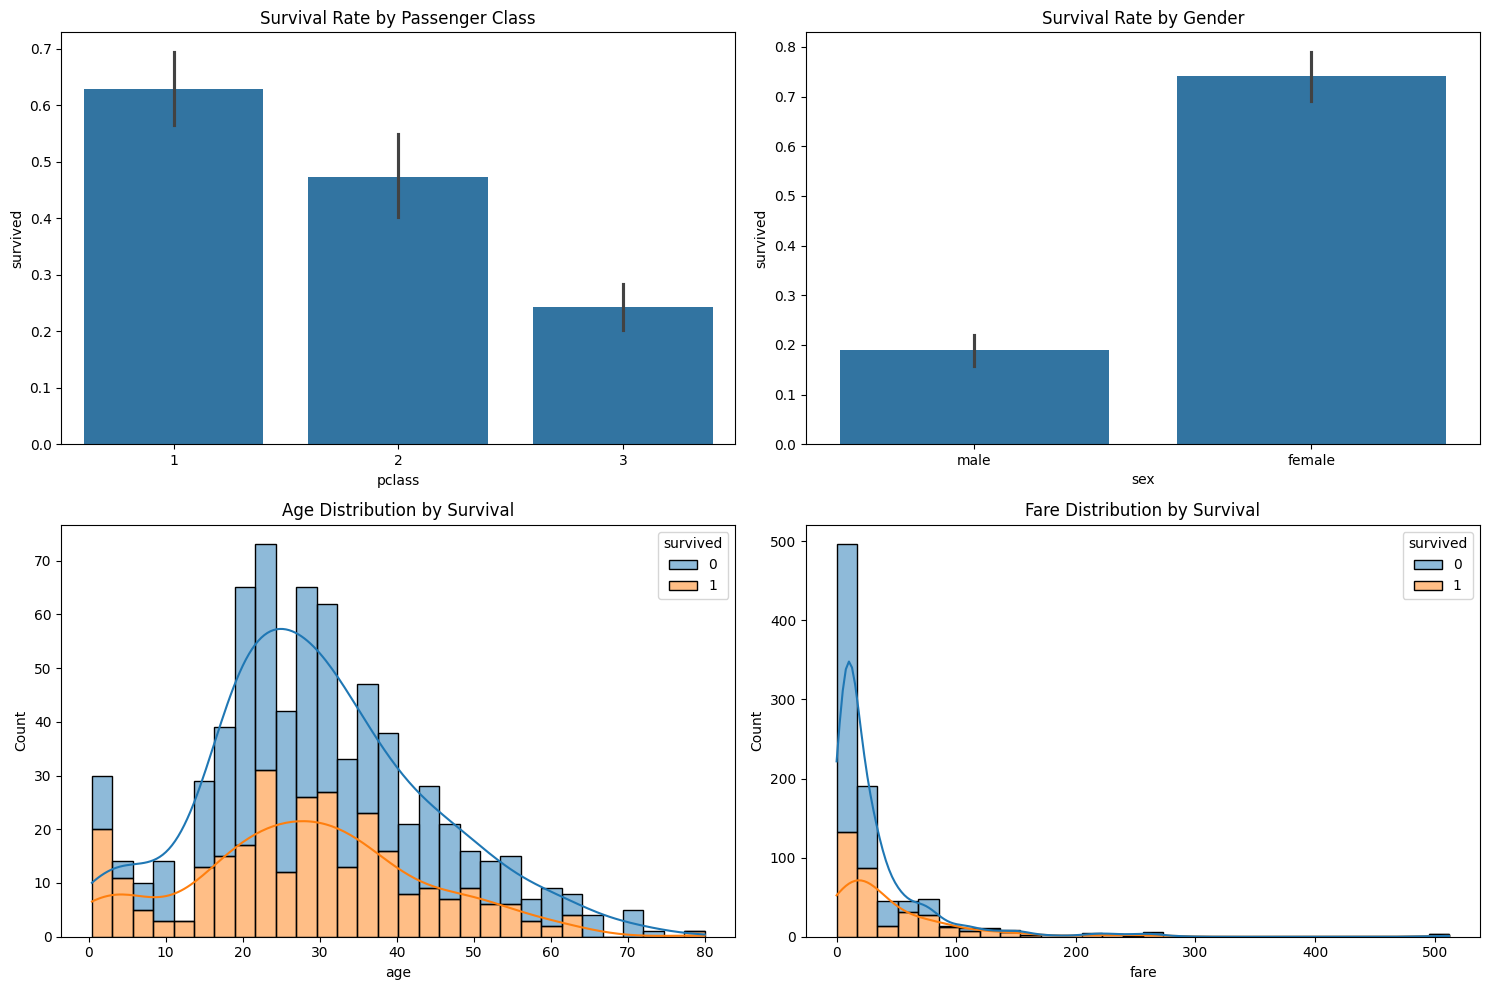

In [6]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.barplot(x='pclass', y='survived', data=titanic)
plt.title('Survival Rate by Passenger Class')

plt.subplot(2, 2, 2)
sns.barplot(x='sex', y='survived', data=titanic)
plt.title('Survival Rate by Gender')

plt.subplot(2, 2, 3)
sns.histplot(data=titanic, x='age', hue='survived', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Survival')

plt.subplot(2, 2, 4)
sns.histplot(data=titanic, x='fare', hue='survived', bins=30, kde=True, multiple='stack')
plt.title('Fare Distribution by Survival')

plt.tight_layout()
plt.show()

### Data Cleaning by Fidelix and Ibraheem    
\- Fix missing passenger ages by guessing (imputing) the average age.    
\- Fill in missing embarkation ports (e.g., use the most common port).    
\- Look for weird numbers (outliers) in ticket prices using boxplots and decide what to do.  

In [7]:
#fixing the missing values of age and embarked with their median and mode respectively
titanic = titanic.assign(
    Age=titanic['age'].fillna(titanic['age'].median()),
    Embarked=titanic['embarked'].fillna(titanic['embarked'].mode()[0])
)

In [8]:
# Outlier detection + removal (chained assignment)
fare_q3 = titanic['fare'].quantile(0.75)
fare_iqr = fare_q3 - titanic['fare'].quantile(0.25)
fare_cap = fare_q3 + 1.5 * fare_iqr  # Tukey's method


In [9]:
titanic = titanic[titanic['fare'] <= fare_cap]

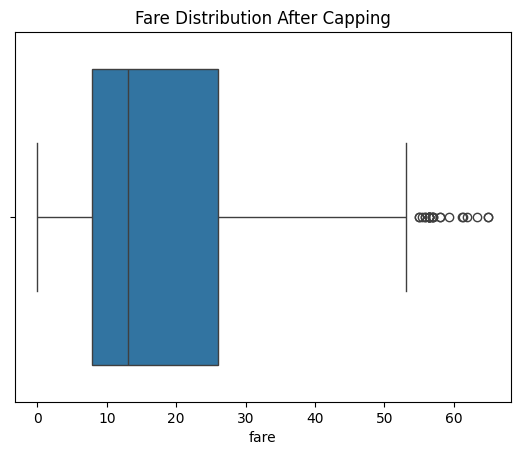

In [10]:
sns.boxplot(x=titanic['fare']).set(title='Fare Distribution After Capping');

### Feature Engineering by Kaothara and Yetunde
\- Create a Family Size feature by adding siblings (SibSp) and parents (Parch).    
\- Group ages into buckets like "kids," "teens," "adults," and "seniors."    
\- Group ticket prices into "cheap," "medium," and "expensive."  

In [11]:
### How many of them in the family
titanic['FamilySize'] = titanic['sibsp'] + titanic['parch']
# Define age bins and corresponding labels
bins = [0, 2, 12, 17, 64, 80]  # Adjust maximum age as needed
labels = ['Infant', 'Kid', 'Teen', 'Adult', 'Old_Age']

# Create a new column with age categories
titanic['AgeGroup'] = pd.cut(titanic['age'], bins=bins, labels=labels, right=True)

# Define fare bins and labels
## The fare group is created based on the Fare Statistics Summary
bins = [0, 13, 26, 66]  # 0–13: Cheap, >13–26: Medium, >26–65+: Expensive
labels = ['Cheap', 'Medium', 'Expensive']

# Create a new column
titanic['FareGroup'] = pd.cut(titanic['fare'], bins=bins, labels=labels, right=False)

In [12]:
### Feature Interaction
titanic['FG_class'] = titanic['FareGroup'].astype(str) + '_' + titanic['class'].astype(str) ## Fare Group and Class interaction
titanic['Age_Embarked'] = titanic['AgeGroup'].astype(str) + '_' + titanic['Embarked'].astype(str) ## Age Group and Embarked
titanic['Sex_Class'] = titanic['sex'].astype(str) + '_' + titanic['class'].astype(str) ### Sex and Class they are

### Data Transformation by Toluwalope and Ibraheem
\- Turn words (categories) like "male/female" or "embarkation port" into numbers (encoding).    
\- Scale numbers like age, fare, and family size so they’re fair for the model.  

### Model training by All the team members
\- Split passengers into a training group (70%) and a test group (30%).    
\- Teach the computer (train a model) to guess survival using Logistic Regression.    
\- Check if the computer is good at guessing (accuracy, confusion matrix).  

### Short Report